# Homework # 4 Naive BAYES Classifier

### Instructor - Dr. Uma Gajendragadkar

### Problem - Design and develop Machine learning model to predict Diabetes using Naive Bayes Algorithm. 

### Dataset - Diabetes dataset

This dataset consists of 768 observations & 8 numerical independent variables.
Dependent and target variable is OUTCOME. 1 means diabetes test result being positive, 0 means indicates negative.

Pregnancies: Number of Times Being Pregnant

Glucose: Plasma Glucose Concentration (a 2 hours in an oral glucose tolerance test)

BloodPressure: Diastolic Blood Pressure (mm Hg)

SkinThickness: Triceps Skin Fold Thickness (mm)

Insulin: 2-Hour Serum Insulin (mu U/ml)

BMI: Body Mass Index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes Pedigree Function

Age: Age

Outcome: Class variable ( 0 - 1)



In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_validate
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot  as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


Step 1 - Write code to Read data from dataset into pandas dataframe

In [44]:
raw_diabetes=pd.read_csv('diabetes.csv')

Step 2 - a) Write code to display dataset info 
b) Print 10 rows from dataset.

In [45]:
print(raw_diabetes.info())
raw_diabetes.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1
5,5,116,74,0,0,25.600,0.201,30,0
6,3,78,50,32,88,31.000,0.248,26,1
7,10,115,0,0,0,35.300,0.134,29,0
8,2,197,70,45,543,30.500,0.158,53,1
9,8,125,96,0,0,0.000,0.232,54,1


Step 3 - Write code to remove Pregnancy column 

In [46]:
diabetes_no_preg = raw_diabetes.drop(columns=['Pregnancies'])
diabetes_no_preg.head(10)
raw_diabetes=diabetes_no_preg
#I did it this way to make sure I had achieved the expected outcome prior to modifying the original database

Step 4 - Write code to display info of dataset and check shape of dataset.

In [47]:
raw_diabetes.info()
print(raw_diabetes.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB
(768, 8)


Step 5 - Write code to clean data

In [48]:
#Rows with a value of 0 in Skin thickness, insulin, glucose, bmi and blood pressure makes no sense. You  These rows should be dropped,
# or have the 0's turned into the column mean, as I believe they are using 0 as a placeholder for NaN. The only columns where a 0 makes sense could be pregnancies and age


raw_diabetes['Insulin'] = raw_diabetes['Insulin'].replace(0, raw_diabetes['Insulin'].mean())
raw_diabetes['Glucose'] = raw_diabetes['Glucose'].replace(0, raw_diabetes['Glucose'].mean())
raw_diabetes['SkinThickness'] = raw_diabetes['SkinThickness'].replace(0, raw_diabetes['SkinThickness'].mean())
raw_diabetes['BMI'] = raw_diabetes['BMI'].replace(0, raw_diabetes['BMI'].mean())
raw_diabetes['BloodPressure'] = raw_diabetes['BloodPressure'].replace(0, raw_diabetes['BloodPressure'].mean())

print(raw_diabetes.shape)
target= raw_diabetes['Outcome']
processed_diabetes = raw_diabetes.drop('Outcome', axis=1)
print(processed_diabetes.shape)
processed_diabetes.head()

(768, 8)
(768, 7)


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.000,72.000,35.000,79.799,33.600,0.627,50
1,85.000,66.000,29.000,79.799,26.600,0.351,31
2,183.000,64.000,20.536,79.799,23.300,0.672,32
3,89.000,66.000,23.000,94.000,28.100,0.167,21
4,137.000,40.000,35.000,168.000,43.100,2.288,33


Step 6 - Split data into training and testing sets ( 80: 20 ratio)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(processed_diabetes, target, test_size=.2, random_state=42)

#### **Step #7: Initialize your model**




In [60]:
print(len(X_train) / len(processed_diabetes)) # training data %
print(len(X_test) / len(processed_diabetes)) # testing data %

model=GaussianNB()

0.7994791666666666
0.20052083333333334


#### **Step #8: Fit your model, test on the testing data, and create a visualization if applicable**

In [61]:
model.fit(X_train, y_train)
#I can't tell if step 8 is including step 9 or not. This reads like a step 8, then 8a, 8b, etc so that's how I completed it

GaussianNB()

Step 9 - Predict using model on test data

In [62]:
prediction= model.predict(X_test)

Step 10 -  Find accuracy of model

In [63]:
model.score(X_test, y_test)

0.7532467532467533

Step 11 - Confusion Matrix

In [64]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[81 18]
 [20 35]]


##### ** Step 11 - Create a visualization**

Use `y_test` and your `prediction` from the model to create a scatter plot. Then use the following line to visualize where a correct prediction would be. The code has already been given to you.
```
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label="Correct prediction")
```

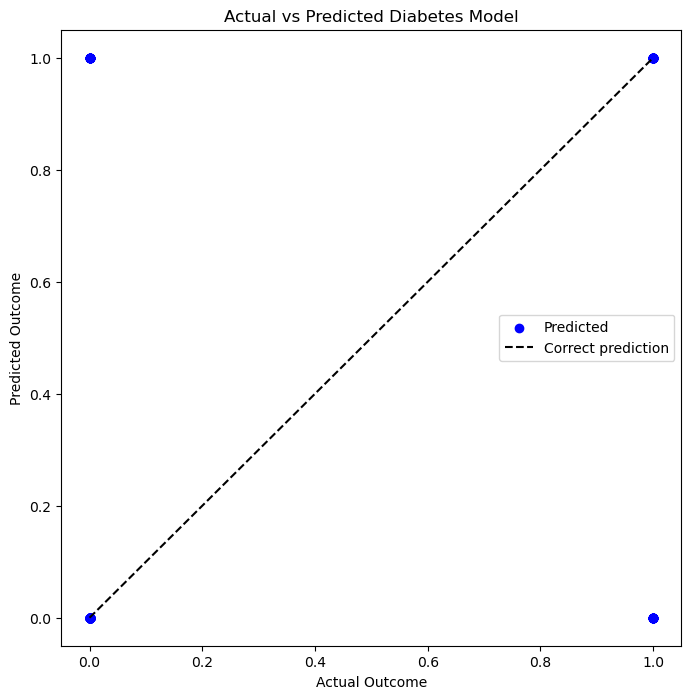

In [65]:
plt.figure(figsize=(8, 8))

plt.scatter(y_test, prediction, c='blue', label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label="Correct prediction")

plt.xlabel('Actual Outcome')
plt.ylabel('Predicted Outcome')
plt.title('Actual vs Predicted Diabetes Model')


plt.legend()

In [66]:
#I can't help but feel like I did this wrong. I think it's graphing the confusion Matrix??? Since TP/TN/FP/FN correlate to 
#coordinates like (0,1) (1,1) (1,0) (0,0)

#### **Step #12: Evaluate your model**

Use mean squared error and the R2 score as the evaluation metrics.


In [67]:
r2 = r2_score(y_test, prediction)
mse = mean_squared_error(y_test, prediction)

print('r2 Score = ' + str(r2))
print('mse =' + str(mse))

r2 Score = -0.074747474747475
mse =0.24675324675324675


In [68]:
#Based on the r2 score and MSE, this is not a great model but I also don't think these metrics are the ones we would be more concerned with, since we
#are trying to predict a binary result. You either have diabetes, or you don't. Reading online, a better metric here would be to use our score, confusion
#matrix, and classification report to evaluate the model. With a score of 75%, this seems ok. I think in a real application of this, diabetes would use a much
#more complicated classifier than Naive Bayes since factors like insulin/bmi/age might actually have more correlative properties than Naive Bayes allows for

In [69]:
print(classification_report(y_test, prediction, target_names=["Negative", "Positive"]))


              precision    recall  f1-score   support

    Negative       0.80      0.82      0.81        99
    Positive       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

